<h2 align='center'>  Clasificador Naive Bayes </h2> 

## Teorema de Bayes

La fórmula del Teorema de Bayes es la siguiente:

$$P(H/E) = \frac{P(E/H)P(H)}{P(E)}$$

donde:

* $P(H|E)$ es la probabilidad de la hipótesis $H$ dado el evento $E$, una probabilidad posterior.


* $P(E|H)$ es la probabilidad del evento $E$ dado que la hipótesis $H$ es verdad.


* $P(H)$ es la probabilidad de la hipótesis $H$ siendo cierto (independientemente de cualquier evento relacionado), o probabilidad previa de $H$.


* $P(E)$ es la probabilidad de que ocurra el evento (independientemente de la hipótesis).

En caso de que se tenga una sola característica, el clasificador Naive Bayes calcula la probabilidad de un evento en los siguientes pasos:

**Paso 1:** Calcular la probabilidad previa para las etiquetas de clase dadas.

**Paso 2:** Determinar la probabilidad de cada atributo para cada clase.

**Paso 3:** Poner estos valores en el teorema de Bayes y calcular la probabilidad posterior.

**Paso 4:** Ver qué clase tiene una probabilidad más alta, dado que la variable de entrada pertenece a la clase de probabilidad más alta.

# Juagamos con la BDD

### Librerias

In [25]:
import pandas as pd
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

### Cargamos Dataset

In [26]:
dataframe = pd.read_excel('../bdd/bdd.xlsx')
columnas = ['SEX', 'Age', 'Cardiac FQ', 'Systolic BP', 'Diastolic BP', 'Glucose', 'Hb A/C  %', 'Total Cholest', 'TRIGLICERIDOS', 'LDL', 'HDL', 'HCTO', 'HB', 'Platelets', 'INR', 'Leucocytes', 'C.R.P', 'Ureic nitrogen', 'Uremia', 'Creatinin', 'TTPA', 'TP', 'NA (sodium)', 'K (potassium)', 'CL (Chloride)', 'Fosfatase Alcalin', 'Gamma glutamil', 'GLASGOW at admission', 'NIHSS admission', 'RANKIN admission', 'NIHSS dismissed', 'RANKIN dismissed', 'NIHSS 6 months', 'RANKIN 6 months', 'PROGNOSIS', 'VEGF/mL', 'PLGF/mL', 'IL-6 (pg/ml)'] #  'Localization', 'Severity'
dataset = dataframe[[*columnas]]
dataset.head(5)

,SEX,Age,Cardiac FQ,Systolic BP,Diastolic BP,Glucose,Hb A/C %,Total Cholest,TRIGLICERIDOS,LDL,...,NIHSS admission,RANKIN admission,NIHSS dismissed,RANKIN dismissed,NIHSS 6 months,RANKIN 6 months,PROGNOSIS,VEGF/mL,PLGF/mL,IL-6 (pg/ml)
0,1,53,78,162,64,137.09,5.9,268,130,202,...,14,5,42,6,2,6,Bad,448.22265,71.993015,18.586835
1,1,54,56,130,89,136.00,6.5,187,130,118,...,6,5,0,2,0,2,Good,302.91950,122.437550,1.263441
2,2,78,91,152,75,359.42,13.8,159,97,26,...,5,3,2,1,2,2,Missing,284.52795,127.826050,49.091862
3,2,87,59,136,86,186.20,5.9,193,133,115,...,1,4,0,2,0,2,Good,428.41470,108.966435,96.544126
4,1,69,104,154,95,170.00,16.7,184,137,125,...,3,4,2,1,0,1,Good,221.23940,117.647850,43.309864


### Información del Dataset

In [27]:
print('Información del Dataset')
print(dataframe.keys())
print()

Información del Dataset
Index(['Code', 'Localization', 'Severity', 'SEX', 'Age', 'Cardiac FQ',
       'Systolic BP', 'Diastolic BP', 'Glucose', 'Hb A/C  %', 'Total Cholest',
       'TRIGLICERIDOS', 'LDL', 'HDL', 'HCTO', 'HB', 'Platelets', 'INR',
       'Leucocytes', 'C.R.P', 'Ureic nitrogen', 'Uremia', 'Creatinin', 'TTPA',
       'TP', 'NA (sodium)', 'K (potassium)', 'CL (Chloride)',
       'Fosfatase Alcalin', 'Gamma glutamil', 'GLASGOW at admission',
       'NIHSS admission', 'RANKIN admission', 'NIHSS dismissed',
       'RANKIN dismissed', 'NIHSS 6 months', 'RANKIN 6 months', 'PROGNOSIS',
       'VEGF/mL', 'PLGF/mL', 'IL-6 (pg/ml)', 'exosomas', 'NPROGNOSIS'],
      dtype='object')



## Separamos los datos de entrenamiento y validación

In [28]:
X = dataset.drop('PROGNOSIS',axis=1)

In [29]:
Y = dataset['PROGNOSIS']

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3)

## Creamos el modelo

In [31]:
modelo = GaussianNB()

## Entrenamos el modelo

In [32]:
modelo.fit(X_train, y_train)

GaussianNB()

## Predicciones

In [44]:
prediccion = modelo.predict(X_test)

## Determinamos la precisión del modelo

In [45]:
#precision = precision_score(y_test, y_pred)
from sklearn import metrics

print("Tasa de acierto: {:4f}".format(metrics.accuracy_score(y_test,prediccion)))
print('Precisión del modelo:')
#print(precision)

Tasa de acierto: 0.714286
Precisión del modelo:


In [46]:
print('Reporte de clasificacion:\n')
print(metrics.classification_report(y_test, prediccion))

Reporte de clasificacion:

              precision    recall  f1-score   support

         Bad       1.00      0.50      0.67         4
        Good       0.67      1.00      0.80         8
        Miss       0.00      0.00      0.00         1
     Missing       0.00      0.00      0.00         1

    accuracy                           0.71        14
   macro avg       0.42      0.38      0.37        14
weighted avg       0.67      0.71      0.65        14



C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Abraham\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(av

## Verifico la matriz de Confusión

In [35]:
matriz = confusion_matrix(y_test, y_pred)
print('Matriz de Confusión:')
print(matriz)

Matriz de Confusión:
[[2 2 0 0]
 [0 8 0 0]
 [0 1 0 0]
 [0 1 0 0]]


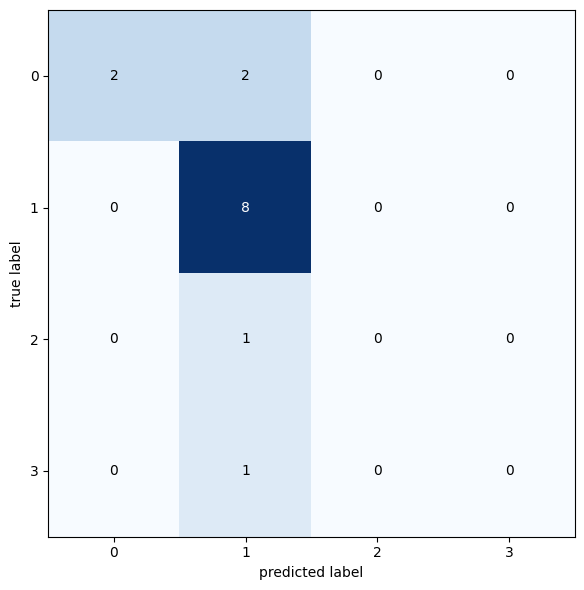

In [38]:
from mlxtend.plotting import plot_confusion_matrix
from matplotlib import pyplot as plt

plot_confusion_matrix(conf_mat=matriz, figsize=(6,6), show_normed=False)
plt.tight_layout()